In [93]:
import re
import csv
import os

In [94]:
def extract_data_from_md(file_path):
    """从给定的Markdown文件中提取数据"""
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read()

    # 定义类别列表
    categories = ["升学", "志愿", "教务", "思政", "心理", "灾害", "作业与考试", "竞赛与机会", "企业参观与就业", "生活", "重要通知", "垃圾与乐子"]

    # 提取通知内容
    data = []
    for category in categories:
        pattern = f'### {category}\n\n(.*?)(?=(### {category}|### {"|### ".join(categories[1:])}|$))'
        matches = re.findall(pattern, content, re.DOTALL)
        for match in matches:
            notices = match[0].split('\n\n')
            for notice in notices:
                if notice.strip():
                    data.append((category, notice.strip()))

    return data

In [95]:
def write_to_csv(data, csv_path):
    """将数据写入CSV文件"""
    with open(csv_path, "w", encoding="utf-8", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["类别", "通知内容"])
        writer.writerows(data)

In [96]:
# 主程序开始
folder_path = "./"
csv_output_path = "./combined_data.csv"
all_data = []

In [97]:
# 循环处理每个Markdown文件
for filename in os.listdir(folder_path):
    if filename.endswith(".md"):
        file_path = os.path.join(folder_path, filename)
        all_data.extend(extract_data_from_md(file_path))

In [98]:
# 将所有数据写入一个CSV文件
write_to_csv(all_data, csv_output_path)

获取相关统计信息

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# 从CSV文件中读取数据
df = pd.read_csv('./combined_data.csv')

In [100]:
# 计算每列中的缺失值数量
missing_values_count = df.isnull().sum()

# 过滤出有缺失值的列
columns_with_na = missing_values_count[missing_values_count > 0]

# 打印结果
print(columns_with_na)

Series([], dtype: int64)


In [101]:
# 查找缺失值所在的行
df[df.isnull().any(axis=1)]

,类别,通知内容


In [102]:
# 统计每个类别的数量
category_counts = df['类别'].value_counts()

# 显示通知内容的长度分布
df['内容长度'] = df['通知内容'].apply(len)
content_length = df['内容长度']

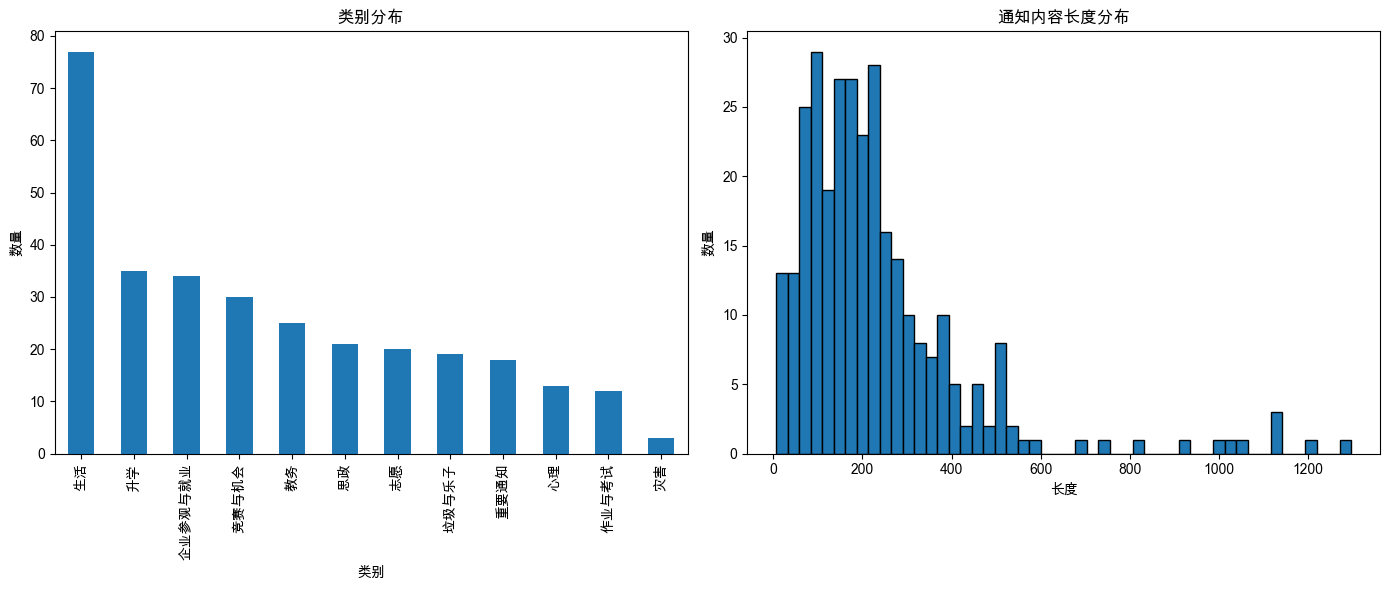

In [103]:
import matplotlib.pyplot as plt

# 如果是macos系统，设置字体
import platform
if platform.system() == "Darwin":  # 判断是否是MacOS
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 设置字体为Arial Unicode MS

# 继续原有的绘图代码
plt.figure(figsize=(14,6))

# 绘制类别分布的柱状图
plt.subplot(1, 2, 1)
category_counts.plot(kind='bar')
plt.title('类别分布')
plt.xlabel('类别')
plt.ylabel('数量')

# 绘制通知内容长度的直方图
plt.subplot(1, 2, 2)
content_length.plot(kind='hist', bins=50, edgecolor='black')
plt.title('通知内容长度分布')
plt.xlabel('长度')
plt.ylabel('数量')

plt.tight_layout()
plt.show()


In [104]:
# 打印统计数据
print("总类别数量:", df['类别'].nunique())
print("\n每个类别的通知数量:\n", category_counts)
print("\n内容长度描述:\n", content_length.describe())


总类别数量: 12

每个类别的通知数量:
 类别
生活         77
升学         35
企业参观与就业    34
竞赛与机会      30
教务         25
思政         21
志愿         20
垃圾与乐子      19
重要通知       18
心理         13
作业与考试      12
灾害          3
Name: count, dtype: int64

内容长度描述:
 count     307.000000
mean      233.029316
std       202.122340
min         6.000000
25%       109.000000
50%       188.000000
75%       286.500000
max      1297.000000
Name: 内容长度, dtype: float64
